In [8]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:90%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:14pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li, code{font-size:22pt; line-height:30px;}
div.output {font-size:14pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:14pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:14pt;padding:5px;}
table.dataframe{font-size:14px;}
</style>
"""))

# <span style="color:red">ch1. NLTK 자연어처리 패키지</span>
```
- 자연어처리 : 텍스트전처리, 단어의 빈도수 측정, 문서유사도 측정, 연관분석, 딥러닝, 
             워드임베딩, 텍스트분류, 어휘 데이터 베이스 사용, 감성분석, 분류분석
```
## 1. NLTK 패키지
- 텍스트 전처리 : 토큰화(문장, 어절, 형태소 나누기), 정규표현식을 이용하여 불용어 처리, 어간추출
- 품사태깅 : 단어별 품사를 식별
```
pip install nltk==3.7
```

In [2]:
import nltk

In [3]:
# 말뭉치 다운로드 받을 폴더
# c:/nltk_data, d:/nltk_data, e:/nltk_data,
# c:/Users/내컴퓨터이름/nltk_data
# c:/Users/내컴퓨터이름/anaconda3/nltk_data,
# c:/Users/내컴퓨터이름/anaconda3/share/nltk_data,
# c:/Users/내컴퓨터이름/anaconda3/lib/nltk_data
# c:/Users/내컴퓨터이름/AppData/Roaming/nltk_data
nltk.download()  # nltk.download('gutenberg')

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
# 말뭉치 리스트
nltk.corpus.gutenberg.fileids()   # C:\nltk_data\corpora\gutenberg

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
# 오스틴 소설 엠마 내용
emma = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma[:50])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I





In [6]:
type(emma), len(emma)

(str, 887071)

In [7]:
# sent_tokenize() : 문장 단위로 쪼갠 list 반환
from nltk.tokenize import sent_tokenize
sent_tokens = sent_tokenize(emma)
print('문장수 :', len(sent_tokens))
print("%r" % sent_tokens[0])

문장수 : 7456
'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.'


In [5]:
# word_tokenize() : 단어 단위로 쪼갠 list 반환
from nltk.tokenize import word_tokenize
print(word_tokenize(sent_tokens[0]))

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty-one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her', '.']


In [6]:
# RegexTokenizer 클래스 : 토큰화할 때,정규표현식
from nltk.tokenize import RegexpTokenizer   
ret = RegexpTokenizer('\d+')  # 숫자만 가져오기
digits = ret.tokenize(emma)
print(digits)
ret1 = RegexpTokenizer('\w+') # ('[a-zA-Z0-9]') 
words = ret1.tokenize(sent_tokens[0])
print(words)
ret1 = RegexpTokenizer('[a-zA-Z]+') # 해당 정규표현식에 맞는 단어만 추출
words = ret1.tokenize(sent_tokens[0])
print(words)

['1816', '8', '23', '28', '28', '24', '7', '10', '000', '10', '000', '26']
['Emma', 'by', 'Jane', 'Austen', '1816', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']
['Emma', 'by', 'Jane', 'Austen', 'VOLUME', 'I', 'CHAPTER', 'I', 'Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', 'and', 'had', 'lived', 'nearly', 'twenty', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 'vex', 'her']


## 2. 형태소(의미가 있는 가장 작은 단위) 분석
cf. 자연어 처리의 기본은 형태소 분석과 품사태깅 - 어간추출(Stemming), 품사태깅(PostTagging)

In [7]:
words = ['sending', 'cooking', 'files', 'lives','crying','dying']
# 어간 추출1 : PosterStemmer
from nltk.stem import PorterStemmer, LancasterStemmer, RegexpStemmer
pst = PorterStemmer()
# pst.stem(words[0],words[1])
[pst.stem(word) for word in words]

['send', 'cook', 'file', 'live', 'cri', 'die']

In [8]:
# 어간 추출2 : LancasterStemmer
lst = LancasterStemmer()
[lst.stem(word) for word in words]

['send', 'cook', 'fil', 'liv', 'cry', 'dying']

In [9]:
# 어간 추출3 : RegexpStemmer
rst = RegexpStemmer('ing')
[rst.stem(word) for word in words ]

['send', 'cook', 'files', 'lives', 'cry', 'dy']

## 3. 품사 태깅(PostTagging)

In [10]:
# print('품사 태깅할 내용 :',word_tokenize(sent_tokens[0]))
from nltk.tag import pos_tag
tagged_list = pos_tag(word_tokenize(sent_tokens[0]))
print('품사 태깅 결과 :',tagged_list)

품사 태깅 결과 : [('[', 'NNS'), ('Emma', 'NNP'), ('by', 'IN'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('1816', 'CD'), (']', 'NNP'), ('VOLUME', 'NNP'), ('I', 'PRP'), ('CHAPTER', 'VBP'), ('I', 'PRP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), (',', ','), ('handsome', 'NN'), (',', ','), ('clever', 'NN'), (',', ','), ('and', 'CC'), ('rich', 'JJ'), (',', ','), ('with', 'IN'), ('a', 'DT'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC'), ('happy', 'JJ'), ('disposition', 'NN'), (',', ','), ('seemed', 'VBD'), ('to', 'TO'), ('unite', 'VB'), ('some', 'DT'), ('of', 'IN'), ('the', 'DT'), ('best', 'JJS'), ('blessings', 'NNS'), ('of', 'IN'), ('existence', 'NN'), (';', ':'), ('and', 'CC'), ('had', 'VBD'), ('lived', 'VBN'), ('nearly', 'RB'), ('twenty-one', 'CD'), ('years', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('world', 'NN'), ('with', 'IN'), ('very', 'RB'), ('little', 'JJ'), ('to', 'TO'), ('distress', 'VB'), ('or', 'CC'), ('vex', 'VB'), ('her', 'PRP'), ('.', '.')]


In [11]:
# 명사만 추출 : NN, NNS, NNP, NNPS, PRP
nouns_list = []
for word, tag in tagged_list:
    #print(word, tag)
    # if (tag=='NN') | (tag=='NNS')|(tag=='NNP')|(tag=='NNPS')|(tag=='PRP'):
    # if tag in ['NN','NNS','NNP','NNPS','PRP']:
    if tag.find('NN') != -1:
        nouns_list.append(word)
print(nouns_list)

['[', 'Emma', 'Jane', 'Austen', ']', 'VOLUME', 'Emma', 'Woodhouse', 'handsome', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world']


In [12]:
nouns_list = [word for word, tag in tagged_list if tag.find('NN') != -1]
print(nouns_list)

['[', 'Emma', 'Jane', 'Austen', ']', 'VOLUME', 'Emma', 'Woodhouse', 'handsome', 'clever', 'home', 'disposition', 'blessings', 'existence', 'years', 'world']


## Quiz. emma 소설안에서
- 1. 특수문자가 들어가지 않는 3글자 이상의 단어만 추출해서 품사태깅을 하시오(RegexpTokenizer)
- 2. "Emma"단어가 몇번 등장했는지, 품사태킹이 어떤 품사들로 되어 있는지 모두 출력하시오.
- 3. 내가 원하는 품사(명사:NN, NNS, NNP, NNPS)만 뽑아 등장하는 명사의 종류 갯수 출력하시오.

In [14]:
# 3글자 이상, 알파벳만(특수문자 없음, 숫자 없음)
tokenizer = RegexpTokenizer(r'[A-Za-z]{3,}')
tokens = tokenizer.tokenize(emma)
tokens

['Emma',
 'Jane',
 'Austen',
 'VOLUME',
 'CHAPTER',
 'Emma',
 'Woodhouse',
 'handsome',
 'clever',
 'and',
 'rich',
 'with',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 'seemed',
 'unite',
 'some',
 'the',
 'best',
 'blessings',
 'existence',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 'one',
 'years',
 'the',
 'world',
 'with',
 'very',
 'little',
 'distress',
 'vex',
 'her',
 'She',
 'was',
 'the',
 'youngest',
 'the',
 'two',
 'daughters',
 'most',
 'affectionate',
 'indulgent',
 'father',
 'and',
 'had',
 'consequence',
 'her',
 'sister',
 'marriage',
 'been',
 'mistress',
 'his',
 'house',
 'from',
 'very',
 'early',
 'period',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'have',
 'more',
 'than',
 'indistinct',
 'remembrance',
 'her',
 'caresses',
 'and',
 'her',
 'place',
 'had',
 'been',
 'supplied',
 'excellent',
 'woman',
 'governess',
 'who',
 'had',
 'fallen',
 'little',
 'short',
 'mother',
 'affection',
 'Sixteen',
 'y

In [16]:
# POS Tagging
tagged_list = nltk.pos_tag(tokens)

print("=== 1. 3글자 이상 단어 + POS 태깅 예시 ===")
print(tagged_list[:15])   # 앞 15개 샘플 출력

=== 1. 3글자 이상 단어 + POS 태깅 예시 ===
[('Emma', 'NNP'), ('Jane', 'NNP'), ('Austen', 'NNP'), ('VOLUME', 'NNP'), ('CHAPTER', 'NNP'), ('Emma', 'NNP'), ('Woodhouse', 'NNP'), ('handsome', 'VBD'), ('clever', 'NN'), ('and', 'CC'), ('rich', 'JJ'), ('with', 'IN'), ('comfortable', 'JJ'), ('home', 'NN'), ('and', 'CC')]


In [17]:
# -----------------------------
# 2. “Emma” 단어 등장 횟수 + 어떤 품사로 태깅됐는지 출력
# -----------------------------

# Emma와 Emma의 태깅 목록 찾기
emma_tags = [tag for word, tag in tagged_list if word == "Emma"]
emma_count = len(emma_tags)

print("=== 2. 'Emma' 단어 정보 ===")
print(f"'Emma' 등장 횟수: {emma_count}")
print(f"태깅된 품사 종류: {set(emma_tags)}")

=== 2. 'Emma' 단어 정보 ===
'Emma' 등장 횟수: 865
태깅된 품사 종류: {'RB', 'VB', 'NNP', 'VBN', 'VBP', 'VBD', 'NNPS', 'NNS', 'JJ', 'NN'}


In [18]:
# -----------------------------
# 3. 명사(NN, NNS, NNP, NNPS)만 추출 → 종류 개수 출력
# -----------------------------

noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']

# 명사만 추출
nouns = [word for word, tag in tagged_list if tag in noun_tags]

# 명사의 unique 종류 수
unique_nouns_count = len(set(nouns))

print("=== 3. 명사 종류 개수 ===")
print(f"명사 종류 개수: {unique_nouns_count}")
print()

=== 3. 명사 종류 개수 ===
명사 종류 개수: 4067



In [19]:
from collections import Counter

noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']

# 각 태그별 개수를 세기
tag_count = Counter(tag for word, tag in tagged_list if tag in noun_tags)

print("=== 명사 품사별 등장 개수 ===")
for t in noun_tags:
    print(f"{t}: {tag_count[t]}")

=== 명사 품사별 등장 개수 ===
NN: 18536
NNS: 3585
NNP: 8484
NNPS: 28


In [21]:
# 1. 특수문자가 들어가지 않은 3글자 이상의 단어만 추출해서 품사태깅
from nltk.tokenize import RegexpTokenizer
from nltk.tag import pos_tag
tokenizer  = RegexpTokenizer('\w{3,}')
emma_words = tokenizer.tokenize(emma)
emma_tags  = pos_tag(emma_words)
print('emma 소설의 글자 수:', len(emma))
print('emma 소설의 3글자 이상의 단어 수:', len(emma_words))
print('단어의 종류 수 :', len(set(emma_words)), len(set(emma_tags)))

emma 소설의 글자 수: 887071
emma 소설의 3글자 이상의 단어 수: 123877
단어의 종류 수 : 7630 11678


In [22]:
emma_tags[:5]

[('Emma', 'NNP'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 ('VOLUME', 'NNP')]

In [26]:
# 2. "Emma" 단어가 몇번 등장했는지, Emma의 품사태깅이 어떤 품사들로 되어 있는지 모두 출력
# pos = set()  # Emma의 품사들
# cnt = 0      # Emma 등장 횟수
# for word, tag in emma_tags:
#     if word == "Emma":
#         cnt += 1
#         pos.add(tag)
tags = [tag for word, tag in emma_tags if word == "Emma"]
cnt = len(tags)
pos = set(tags)
print('Emma 등장 횟수 : ', cnt)
print('Emma가 분류된 품사 : ', pos)

Emma 등장 횟수 :  865
Emma가 분류된 품사 :  {'RB', 'VB', 'NNP', 'VBN', 'VBP', 'VBD', 'NNPS', 'NNS', 'JJ', 'NN'}


In [31]:
# Emma로 분류된 품사의 갯수를 sort 출력 - 시리즈로 처리
import pandas as pd 
pos_cnt = pd.Series([0]*len(pos), index=pos)
for word, tag in emma_tags:    # 리스트컴프리헨션 쓸수 없어서....
    if word == 'Emma':
        pos_cnt[tag] += 1
pos_cnt.sort_values(ascending=False)  # 내림차수정렬

NNP     838
NN        7
VB        5
VBP       4
JJ        4
NNPS      2
NNS       2
RB        1
VBN       1
VBD       1
dtype: int64

In [34]:
# 3. 내가 원하는 품사(명사:NN, NNS, NNP, NNPS)만 뽑아 등장하는 명사의 종류별 갯수 출력하시오.
tags = ['NN', 'NNS', 'NNP','NNPS']
# nouns_list = []
# for token tag in emma_tags:
#     if tag in tags:
#         nouns_list.append(token)
nouns_list = [token for token, tag in emma_tags if tag in tags]      
print('명사가 등장한 횟수 : ', len(nouns_list))
print('등장한 명사의 수(중복제거) :', len(set(nouns_list)))
print('한단어가 나오는 평균 빈도수 : ', len(nouns_list)/len(set(nouns_list)))

명사가 등장한 횟수 :  30781
등장한 명사의 수(중복제거) : 4165
한단어가 나오는 평균 빈도수 :  7.3903961584633855


## 4. 최빈 단어 시각화

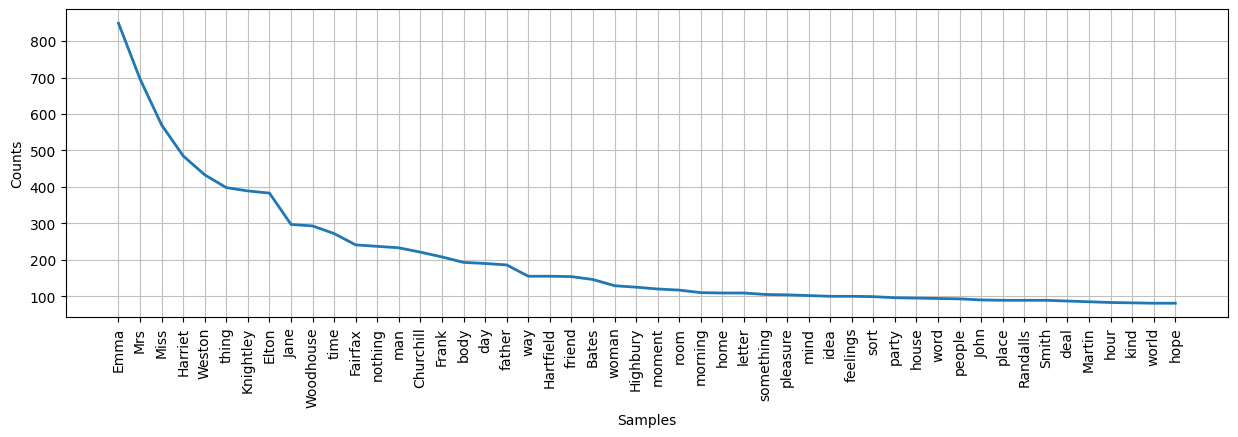

In [39]:
import matplotlib.pyplot as plt
# Text : 단어리스트와 관련된 빈도 분석이나 단어검색을 쉽게 할 수 있는 도구
from nltk import Text
plt.figure(figsize=(15,4))
emma_text = Text(nouns_list)
emma_text.plot(50)
plt.show()

In [40]:
emma_text.count('Emma')

849

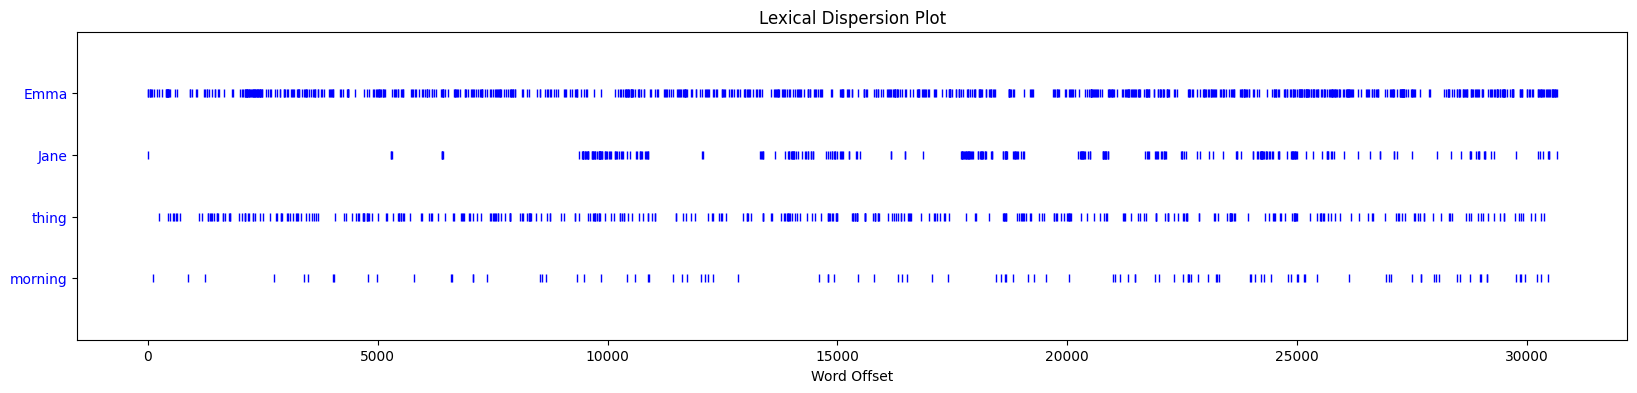

In [45]:
# 단어들이 텍스트 전체에서 어디에 나타나는지 시각적으로 보여주는 분산 그래프
plt.figure(figsize=(20,4))
emma_text.dispersion_plot(['Emma','Jane', 'thing','morning'])

In [48]:
# 고유명사(이름) 출현 빈도
name_list = [word for word, tag in emma_tags if tag.find('NNP') != -1]
from nltk import FreqDist
name_wordcount = FreqDist(name_list)
name_wordcount

FreqDist({'Emma': 840, 'Mrs': 696, 'Miss': 569, 'Harriet': 484, 'Weston': 433, 'Knightley': 389, 'Elton': 382, 'Jane': 295, 'Woodhouse': 293, 'Fairfax': 241, ...})

In [50]:
# 150번 이상 등장되는 고유명사
for name, freq in name_wordcount.items():
    if freq>150:
        print(name, ':', freq)

Emma : 840
Jane : 295
Woodhouse : 293
Miss : 569
Weston : 433
Mrs : 696
Hartfield : 155
Knightley : 389
Elton : 382
Churchill : 221
Frank : 208
Harriet : 484
Fairfax : 241


In [54]:
# 위의 내용을 sort
wordcnt = pd.Series(name_wordcount)
wordcnt.sort_values(ascending=False, inplace=True)
wordcnt[wordcnt>150]

Emma         840
Mrs          696
Miss         569
Harriet      484
Weston       433
Knightley    389
Elton        382
Jane         295
Woodhouse    293
Fairfax      241
Churchill    221
Frank        208
Hartfield    155
dtype: int64

In [ ]:
# 형태소 분석, 품사태깅, 명사추출
# Konlpy(java로 만들어짐),  mecab-ko

